# Tasks: Feb-23



### Imports

- Matplotlib is used for plotting

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
import numpy as np
import pandas as pd
import matplotlib.dates as md
from bokeh.layouts import row
output_notebook()
import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

## Read the data ##

- Create separate data frames for each template

In [2]:
# Read the DAta for room 2138 into the pandas dataframe.
df = pd.read_csv('data/rm2138_all.csv', names=['sensor_id', 'timestamp', 'value', 'room', 'template'],
                 parse_dates=['timestamp']).dropna().drop_duplicates().sort_values(by='timestamp')

# Separate the data for each template
zt = df[df.template == 'Zone Temperature'][['timestamp', 'value']]
dp = df[df.template == 'Damper Position'][['timestamp', 'value']]
asf = df[df.template == 'Actual Supply Flow'][['timestamp', 'value']]
acsp = df[df.template == 'Actual Cooling Setpoint'][['timestamp', 'value']]
ahsp = df[df.template == 'Actual Heating Setpoint'][['timestamp', 'value']]

### API for plotting using bokeh or matplotlib

Invalid date range. no data found for  Actual Heating Setpoint


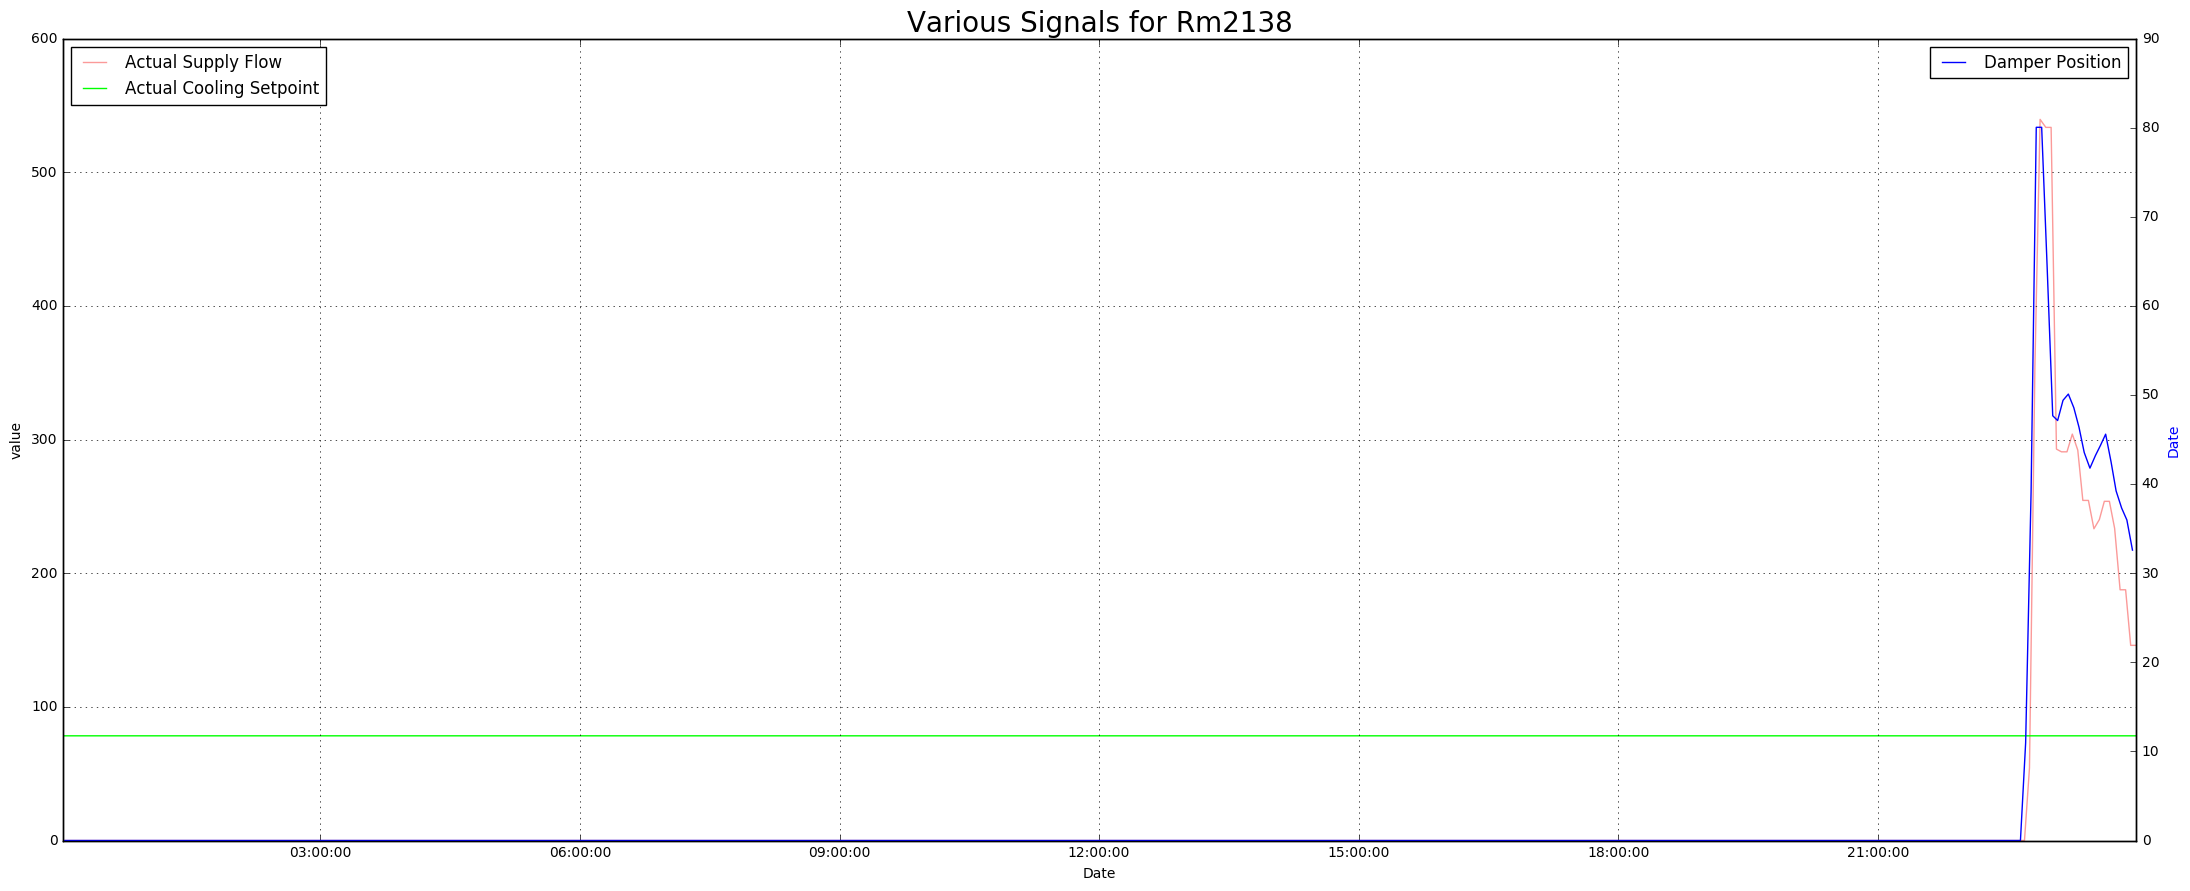

In [6]:
colors = ['#FB9A99', '#00FF00', '#A52A2A']
signal_list = ['Actual Supply Flow',  'Actual Cooling Setpoint', 'Actual Heating Setpoint']
start_date="2014-04-27"
end_date="2014-04-27"


# Setup the figure for the plot using matplotlib

fig, ax1 = plt.subplots(figsize=(22, 9))
ax1.grid()
plt.title("Various Signals for Rm2138", fontsize=20)
ax1.set_xlabel("Date")
ax1.set_ylabel("value")

for i, signal in enumerate(signal_list):
    data = df[df.template == signal]
    if not len(data):
        print "No data for signal", signal
        continue


    # Filter based on dates
    if not start_date == None:
        data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
            (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
        if not len(data):
            print "Invalid date range. no data found for ", signal
            continue

    # Plotting based on bokeh / matplotlib

    ax1.plot(data.timestamp, data.value, color=colors[i], label=signal)


data = df[df.template == 'Damper Position']  
if not start_date == None:
    data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
        (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
    if not len(data):
        print "Invalid date range. no data found for ", signal
    else:
  
        ax2 = ax1.twinx()
        ax2.plot(data.timestamp, data.value, color='#0000FF', label='Damper Position')
        ax2.set_ylabel('Date', color='#0000FF')
fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=0)

### Create Plot for the two template together to see co-relation. Each template on different axis.

In [42]:
def plot_signals_twinx(df, signal_list,  start_date=None, end_date=None):
#     ['Actual Supply Flow', 'Damper Position', 'Actual Cooling Setpoint', 'Actual Heating Setpoint']
#     signal_list = ['Damper Position',  'Actual Cooling Setpoint']    
#     start_date="2014-04-27"
#     end_date="2014-05-04"

    # Setup the figure for the plot using matplotlib

    fig, ax1 = plt.subplots(figsize=(22, 12))

    dates = pd.date_range(start_date, end_date, freq='3H')
    y = np.random.random(dates.size)
    locator = md.HourLocator(range(0, 24, 6))
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M')

    ax1.xaxis.set(major_formatter=xfmt, major_locator=locator)

    ax1.grid()
    plt.title("Signals for Rm2138", fontsize=20)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("value", color='red')


    data = df[df.template == signal_list[0]]
    if not len(data):
        print "No data for signal", signal_list[0]
        # Filter based on dates
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[0]
            else: 
                # Plotting based on matplotlib
                ax1.plot(data.timestamp, data.value, color='red', label=signal_list[0])
                ax1.legend(loc=2)

    data = df[df.template == signal_list[1]] 
    if not len(data):
        print "No data for signal", signal_list[1]
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[1]
            else:
                ax2 = ax1.twinx()
                ax2.plot(data.timestamp, data.value, color='#0000FF', label=signal_list[1])
                ax2.set_ylabel('Value', color='#0000FF')
                ax2.legend(loc=1)
    ## Set the Ticks        
    fig.tight_layout()


    for label in ax1.get_xmajorticklabels() :
        label.set_rotation(45)
        label.set_horizontalalignment("right")

### Plot  Damper Position and Actual Cooling Setpoint between "2014-04-27" and "2014-05-04"  Every three hours
#### Observation ####

1. We see that in a given week ( Sunday to Sunday)  the  Damper Position and Actual Cooling Setpoint have the same fluctuation and looks highly correlated
2. Damper Position fluctuates every 3 hours

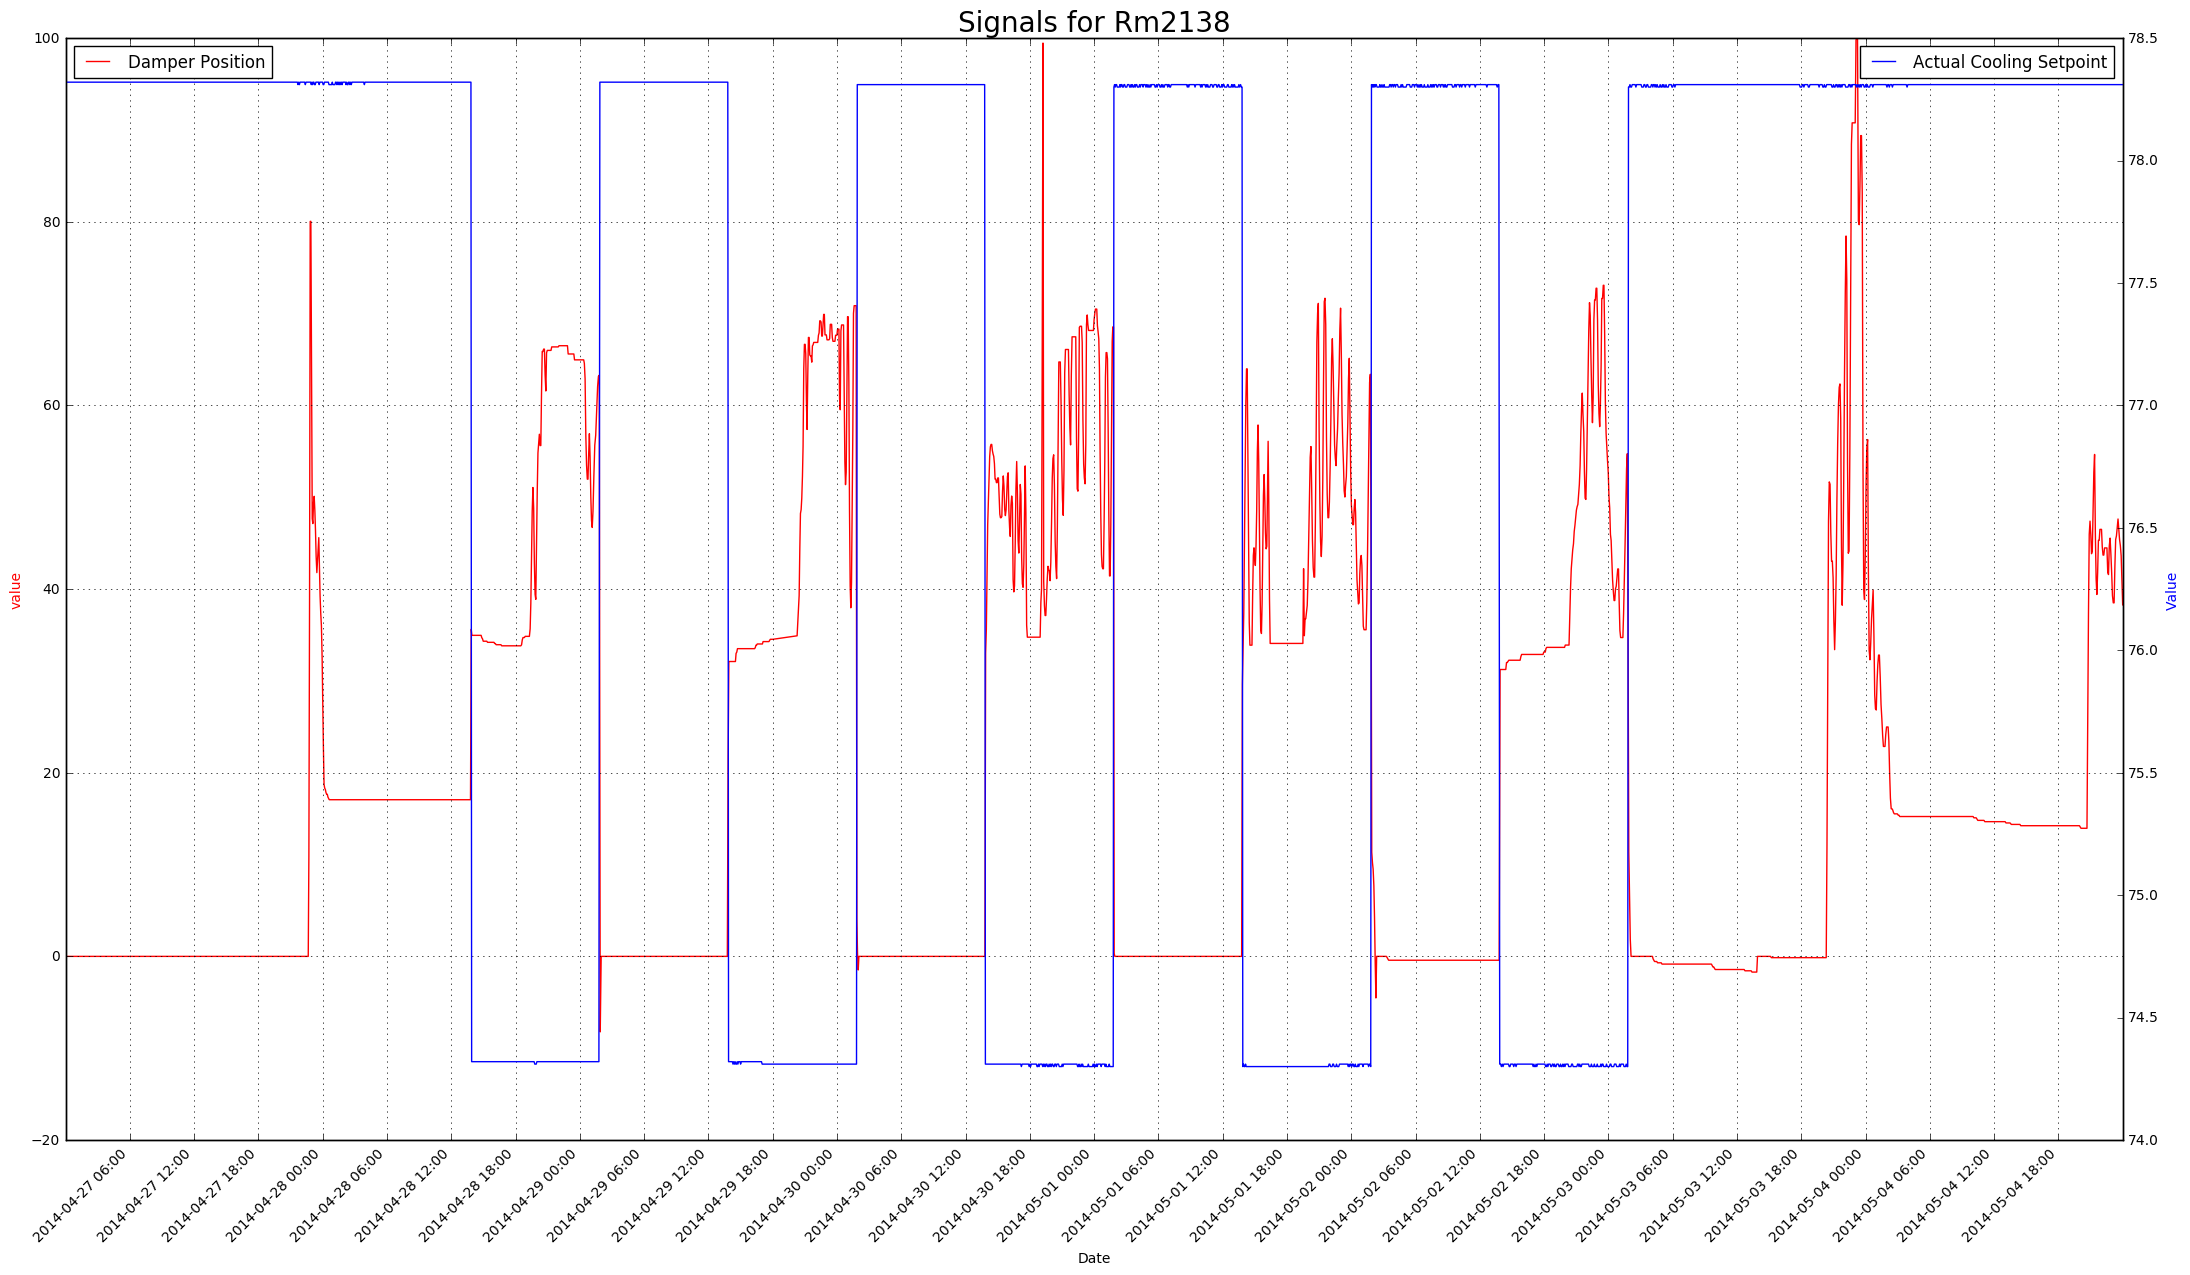

In [43]:
plot_signals_twinx(df, signal_list=['Damper Position',  'Actual Cooling Setpoint'],  start_date="2014-04-27", end_date="2014-05-04")

### Plot  Damper Position and Actual Heating Setpoint between "2014-04-27" and "2014-05-04"  Every three hours
#### Observation ####

1. We see that in a given week ( Sunday to Sunday) Damper Position fluctuates.
2. There is no data for Actual Heating Setpoint

Invalid date range. no data found for  Actual Heating Setpoint


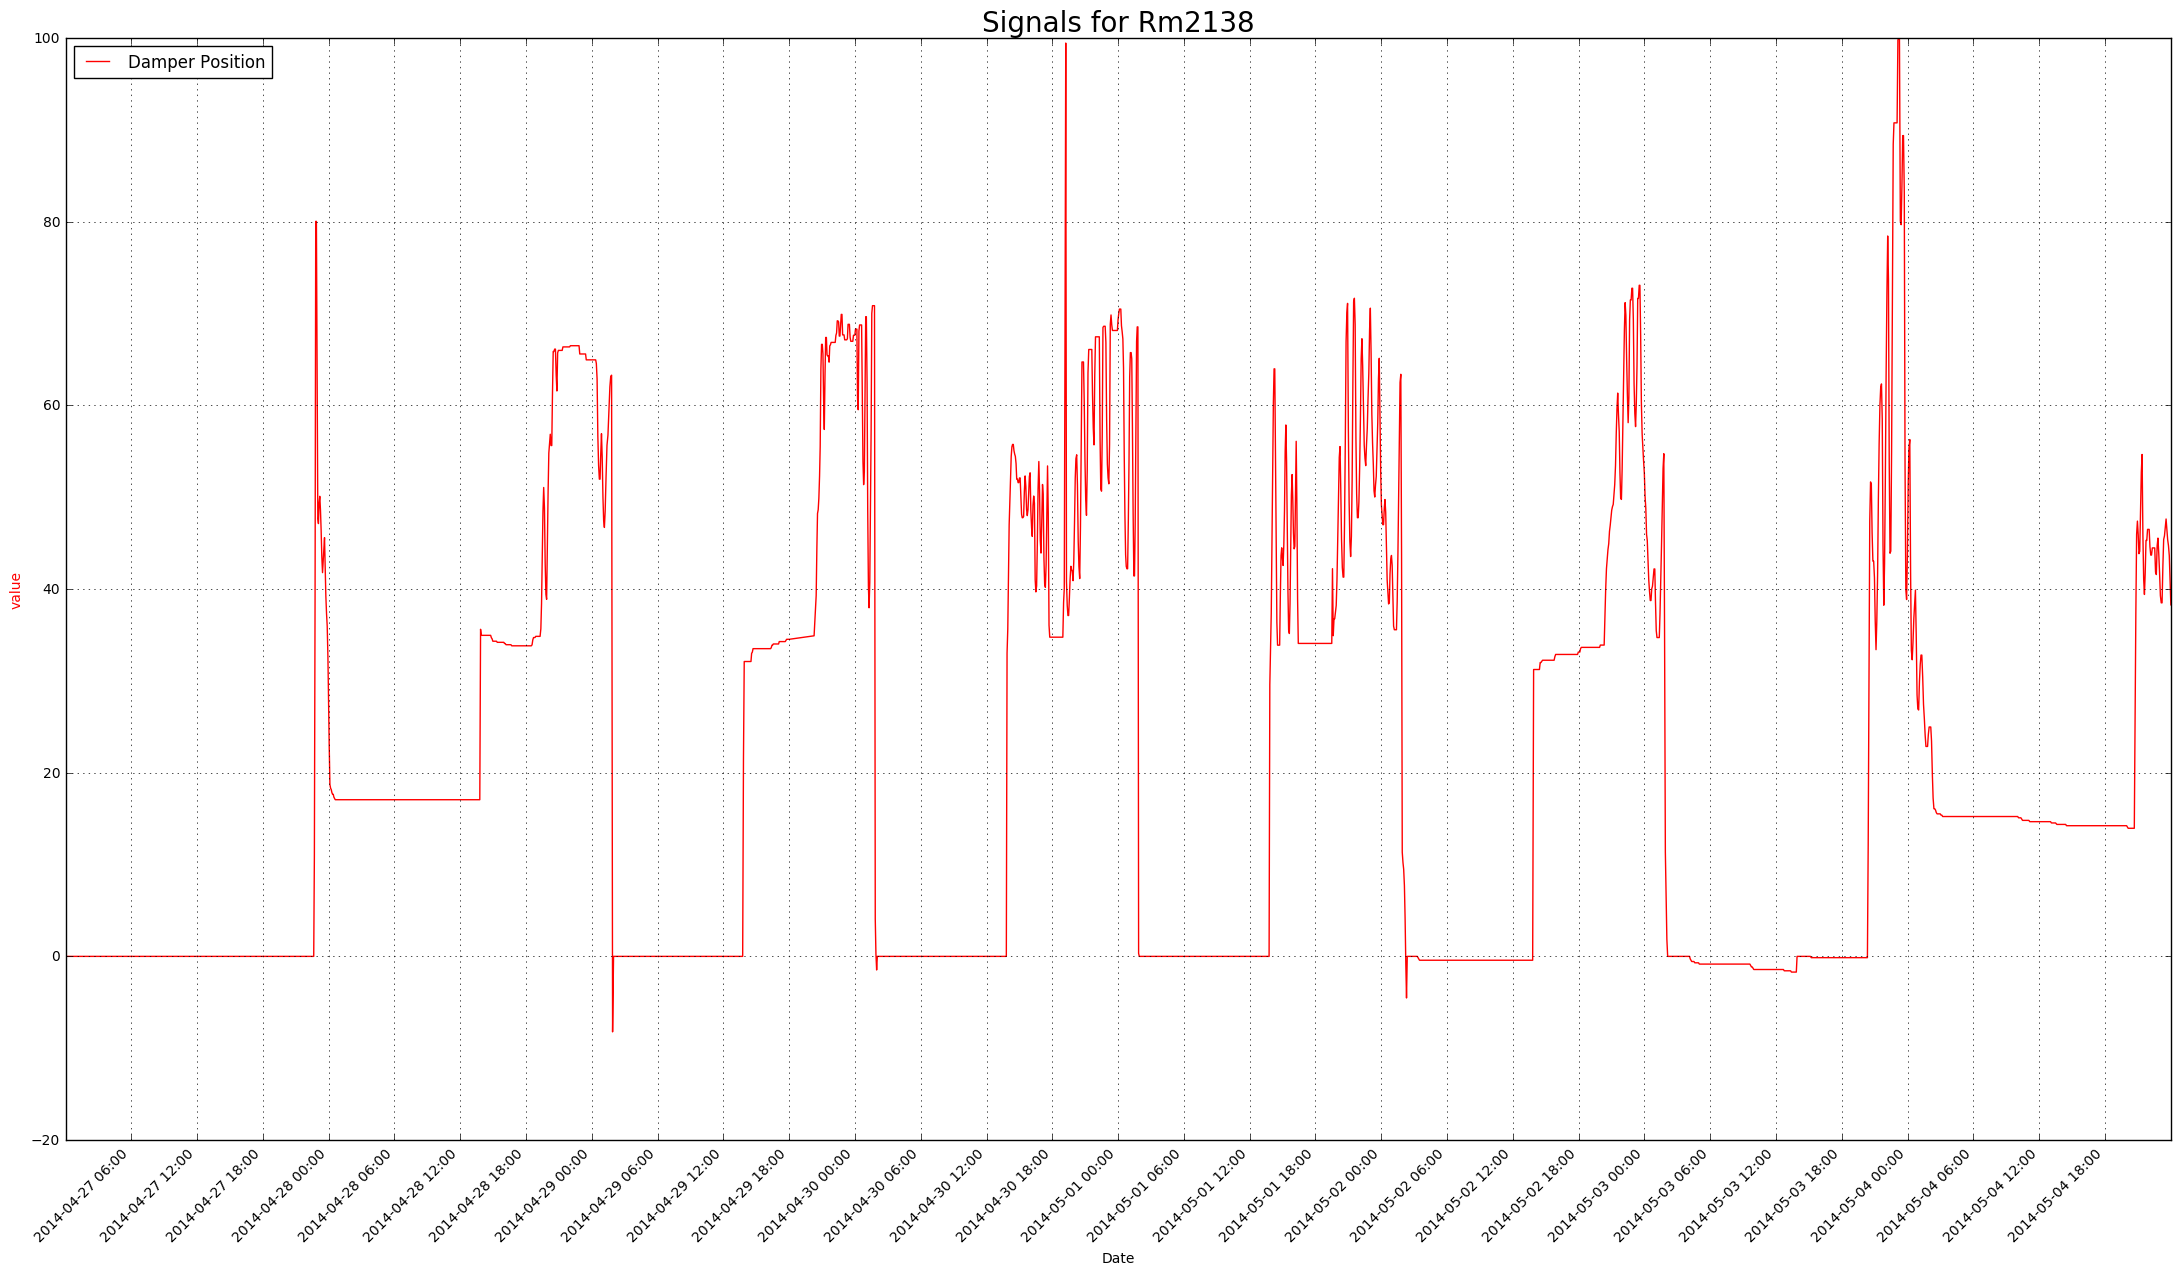

In [44]:
plot_signals_twinx(df, signal_list=['Damper Position',  'Actual Heating Setpoint'],  start_date="2014-04-27", end_date="2014-05-04")

### Plot  Damper Position and Actual Supply Flow between "2014-04-27" and "2014-05-04"  Every three hours
#### Observation ####

1. We see that in a given week ( Sunday to Sunday) Damper Position fluctuates in corelation with Actual Supply Flow
2. Dual Axis has been used as range of data varies


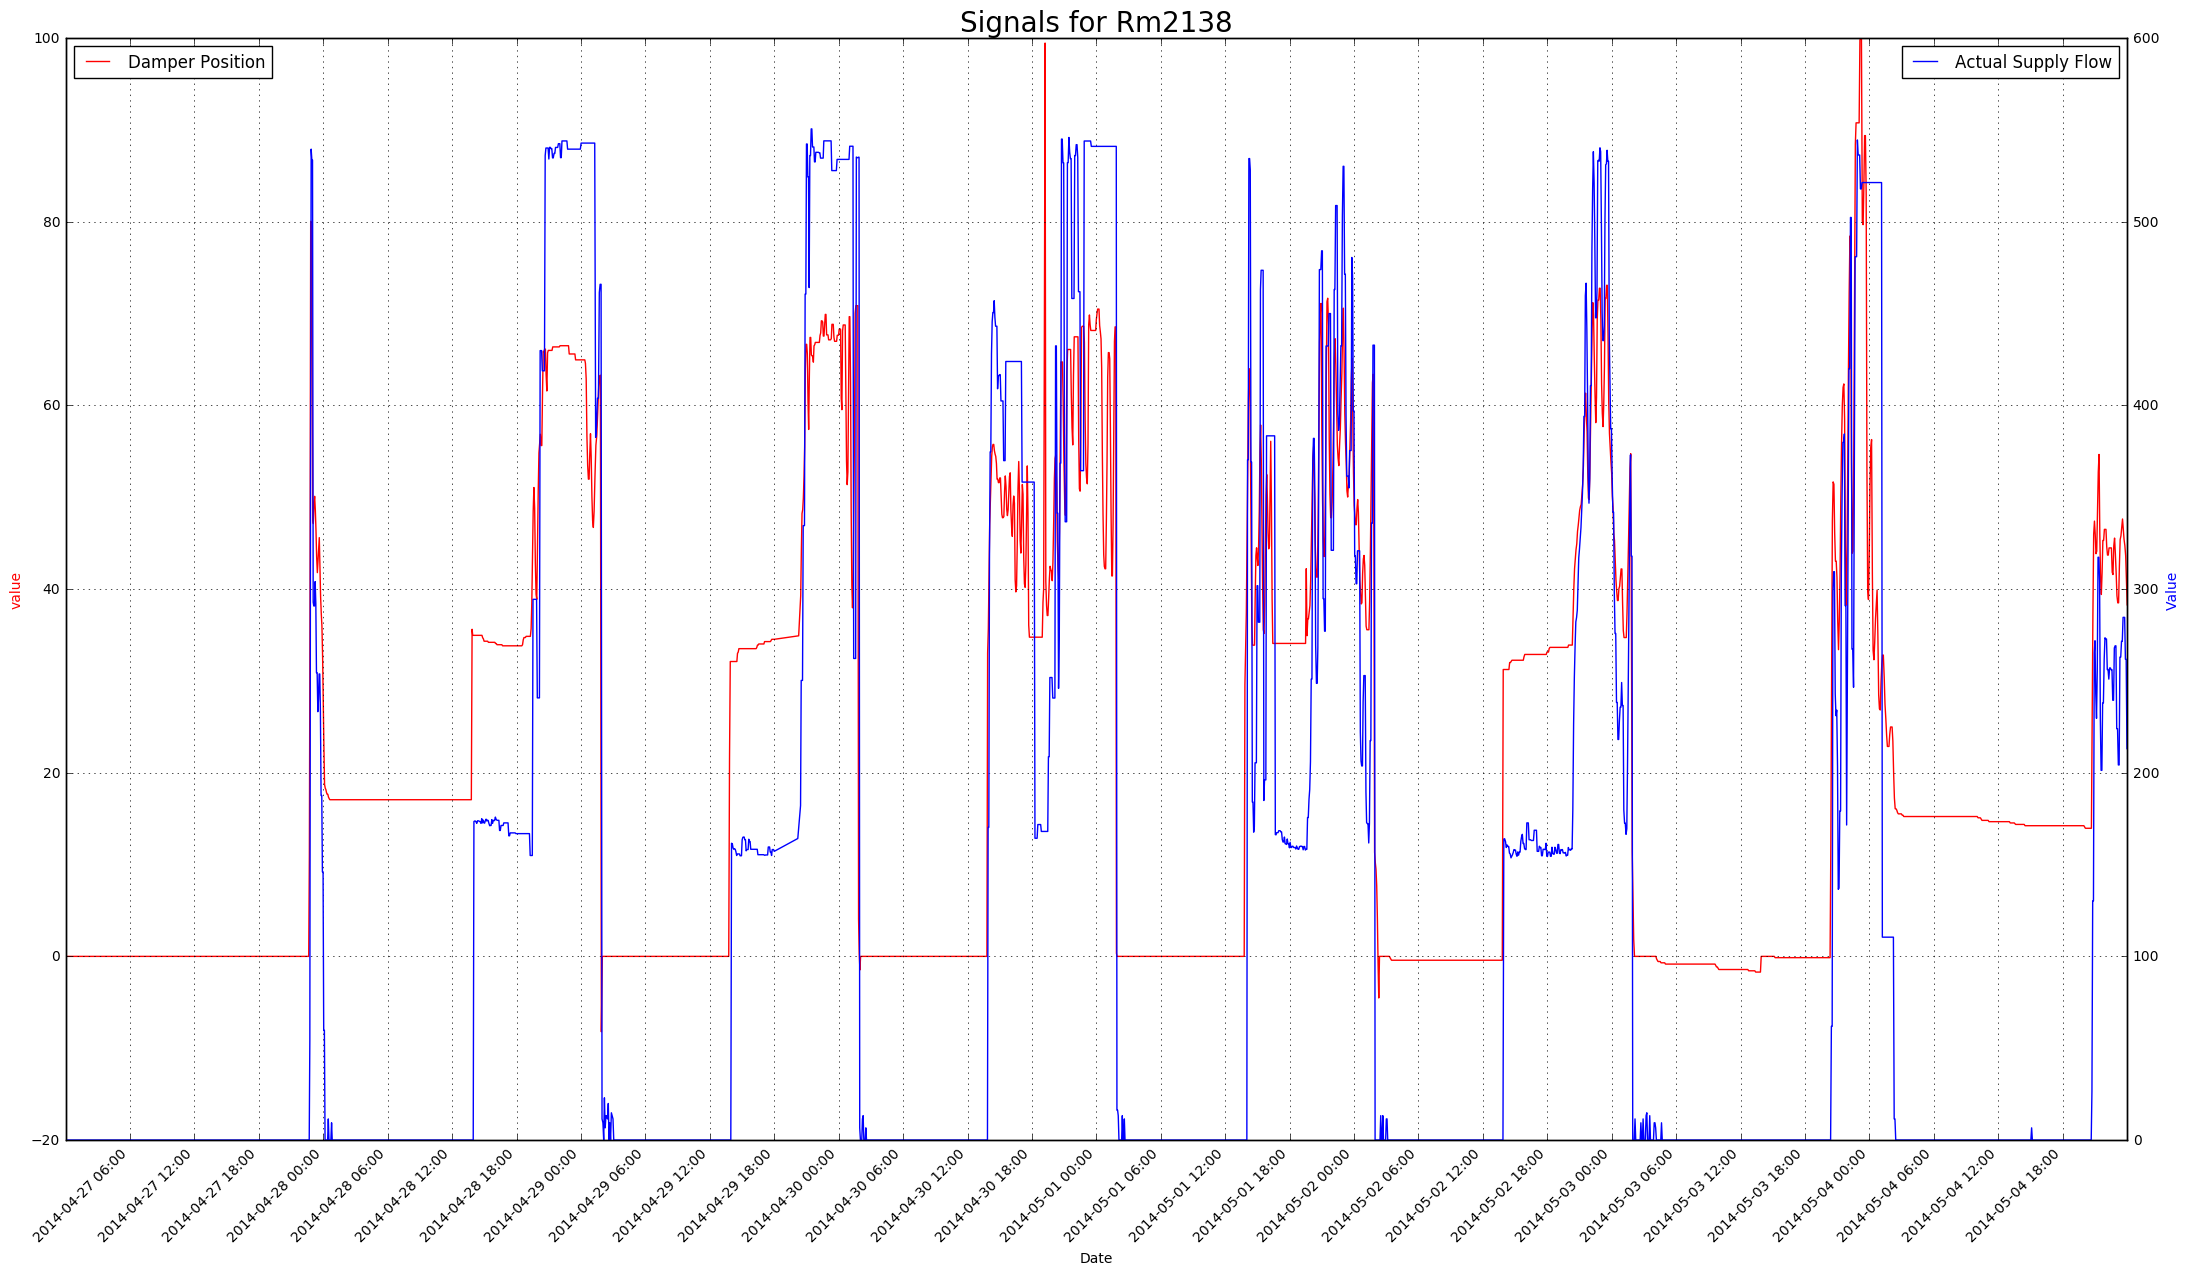

In [45]:
plot_signals_twinx(df, signal_list=['Damper Position',  'Actual Supply Flow'],  start_date="2014-04-27", end_date="2014-05-04")

### Plot  Damper Position and Actual Supply Flow between "2014-04-27" and "2014-05-04"  Every three hours
#### Observation ####

1. We see that in a given week ( Sunday to Sunday) Actual Cooling Setpoint fluctuates  every 3 hours
2. There is no data for  Actual Heating Setpoint
3. Between 12:00 AM - 6:00 PM Values are static

Invalid date range. no data found for  Actual Heating Setpoint


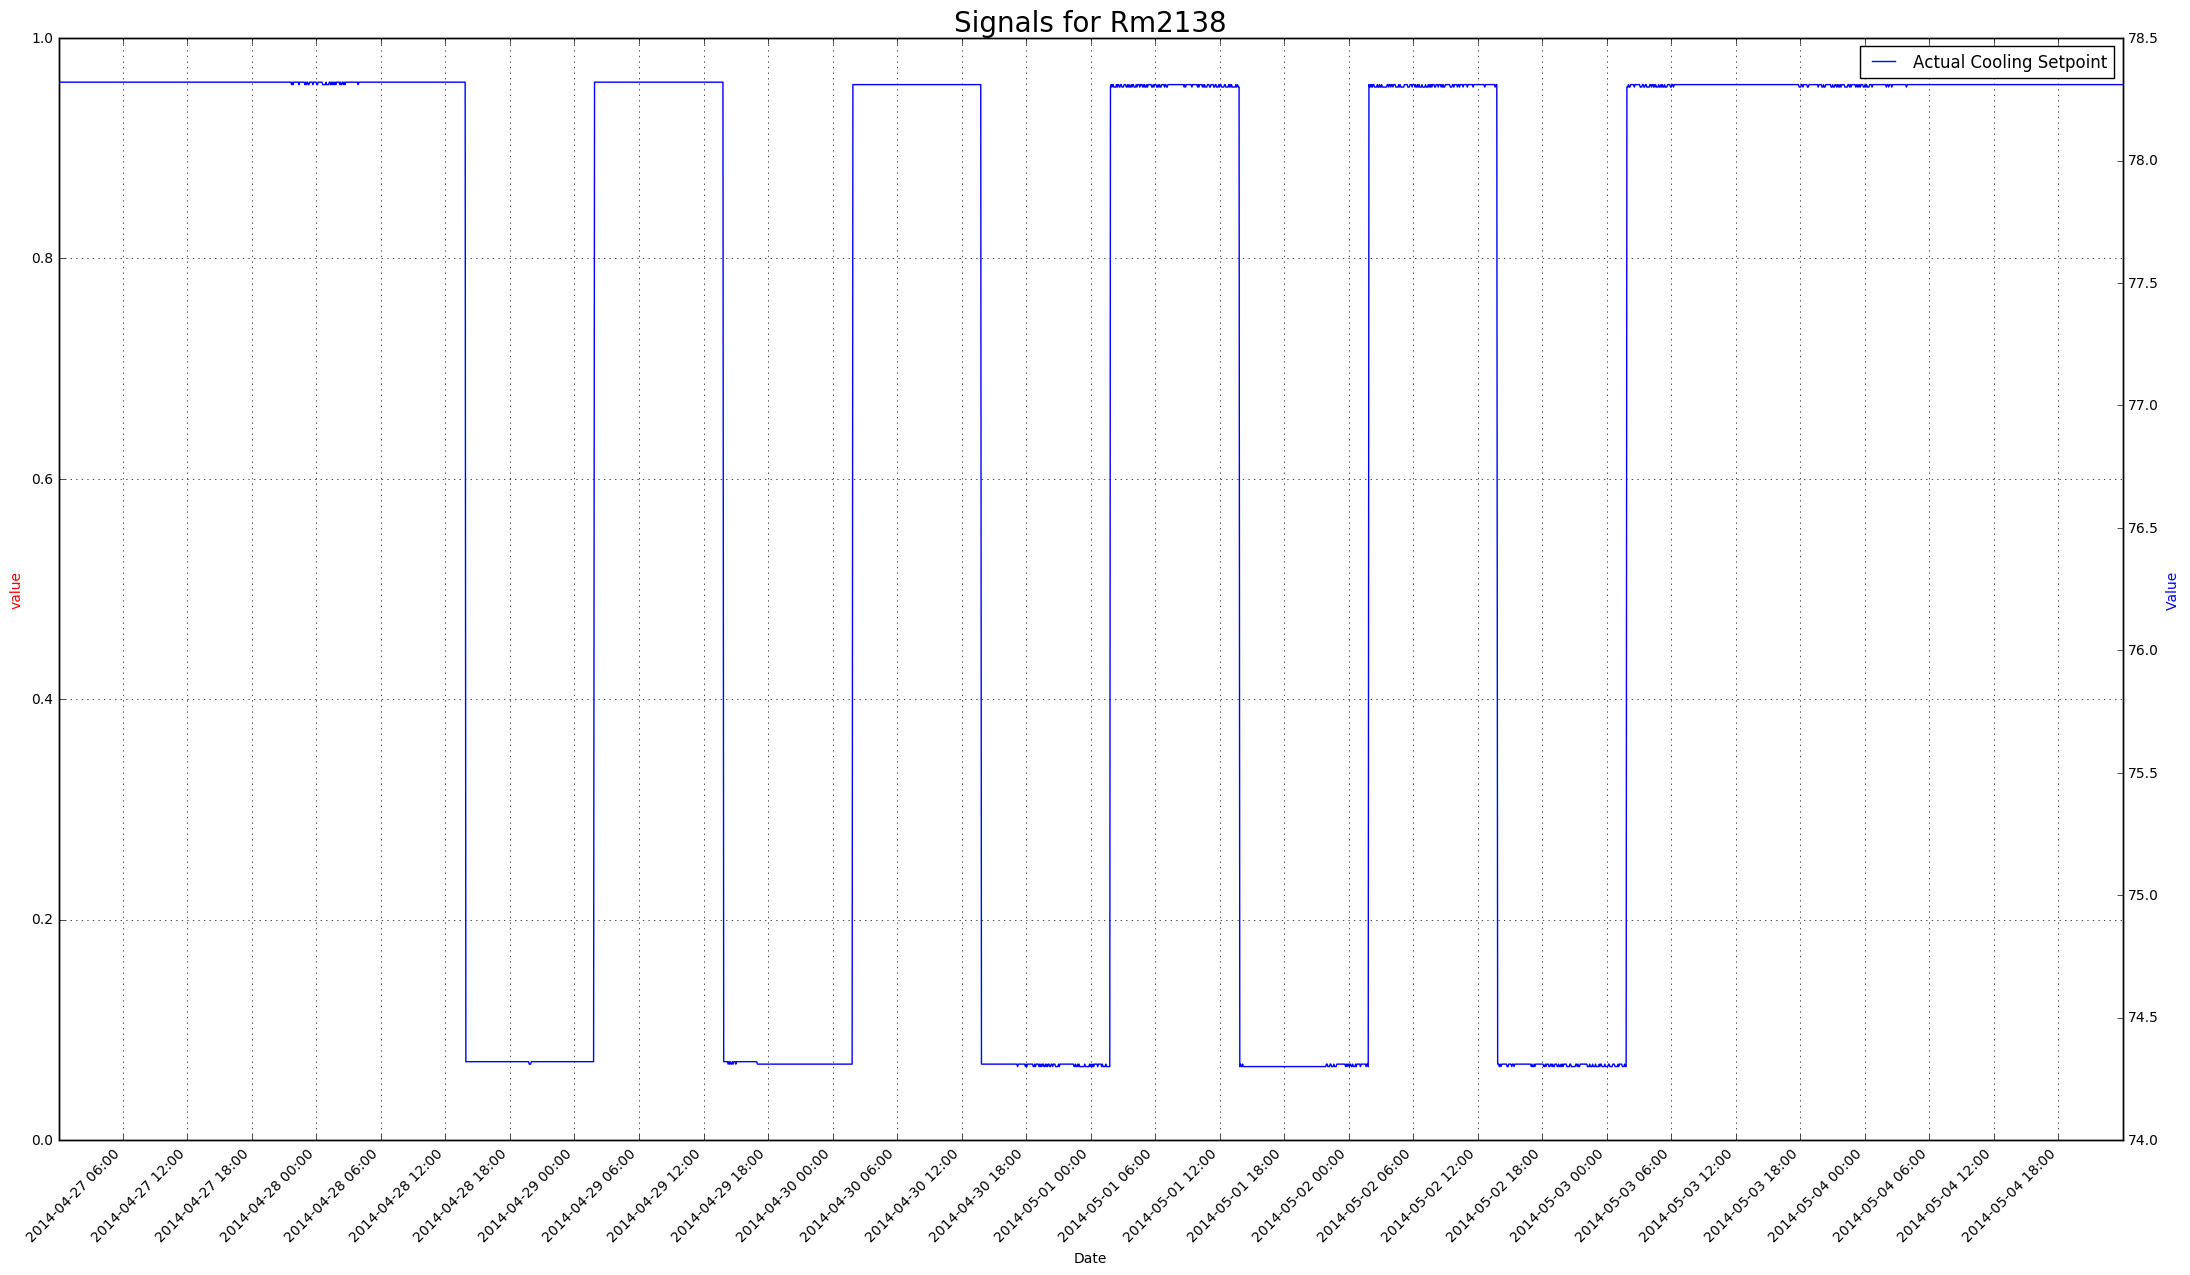

In [46]:
plot_signals_twinx(df, signal_list=['Actual Heating Setpoint',  'Actual Cooling Setpoint'],  start_date="2014-04-27", end_date="2014-05-04")

In [49]:
def plot_signals_template(df, start_date=None, end_date=None):
    signal_list=['Actual Supply Flow', 'Damper Position', 'Actual Cooling Setpoint', 'Actual Heating Setpoint']

    # Setup the figure for the plot using matplotlib
    
    # Create all axes we need
    fig = plt.figure(figsize=(12, 12))

#     plt.tight_layout()
    fig = plt.gcf()
    
    dates = pd.date_range(start_date, end_date, freq='3H')
    locator = md.HourLocator(range(0, 24, 6))
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M')

    data = df[df.template == signal_list[0]]
    if not len(data):
        print "No data for signal", signal_list[0]
        # Filter based on dates
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[0]
            else: 
                ax1 = fig.add_subplot(411)
                ax1.xaxis.set(major_formatter=xfmt, major_locator=locator)
                # Plotting based on matplotlib
                ax1.plot(data.timestamp, data.value, color='red', label=signal_list[0])
                plt.grid()
                ax1.set_xlabel("Date",color='red' )
                ax1.set_ylabel("value", color='blue')
                ax1.legend(loc=2)
                for label in ax1.get_xmajorticklabels() :
                    label.set_rotation(10)
                    label.set_horizontalalignment("right")


    data = df[df.template == signal_list[1]] 
    if not len(data):
        print "No data for signal", signal_list[1]
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[1]
            else:
                ax2 = fig.add_subplot(412)
                ax2.xaxis.set(major_formatter=xfmt, major_locator=locator)
                ax2.plot(data.timestamp, data.value, color='blue', label=signal_list[1])
                plt.grid()
                ax2.set_xlabel("Date",color='red' )
                ax2.set_ylabel("value", color='blue')
                ax2.legend(loc=2)

                for label in ax2.get_xmajorticklabels() :
                    label.set_rotation(10)
                    label.set_horizontalalignment("right")
     
    # Signal 3 in the list    
    data = df[df.template == signal_list[2]]
    if not len(data):
        print "No data for signal", signal_list[2]
        # Filter based on dates
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[2]
            else: 
                # Plotting based on matplotlib
                ax3 = fig.add_subplot(413)
                ax3.xaxis.set(major_formatter=xfmt, major_locator=locator)
                ax3.plot(data.timestamp, data.value, color='green', label=signal_list[2])
                plt.grid()
                ax3.xaxis.set(major_formatter=xfmt, major_locator=locator)
                ax3.set_xlabel("Date",color='red' )
                ax3.set_ylabel("value", color='blue')
                ax3.legend(loc=2)

                for label in ax3.get_xmajorticklabels() :
                    label.set_rotation(10)
                    label.set_horizontalalignment("right") 
    
    # Signal 4 in the list
    data = df[df.template == signal_list[3]] 
    if not len(data):
        print "No data for signal", signal_list[3]
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[3]
            else:
                ax4 = fig.add_subplot(414)
                ax4.xaxis.set(major_formatter=xfmt, major_locator=locator)         
                ax4.plot(data.timestamp, data.value, color='orange', label=signal_list[3])
                plt.grid()
                ax4.set_xlabel("Date",color='red' )
                ax4.set_ylabel("value", color='blue')
                ax4.legend(loc=2)
  
                for label in ax4.get_xmajorticklabels() :
                    label.set_rotation(10)
                    label.set_horizontalalignment("right") 


### Summer Plots for two days ( 7/7 - Sunday and 7/8- Monday)

#### Observations 7/7 - Sunday
        1. Actual Supply workflow Tends to remain static and remain low
        2. Damper position is in corelation with Actual Supply workflow.
#### Observations 7/8 - Monday
        1. Durimg Summer Actual Supply flow tens to increase after 6:00 PM till midnight
        2. Damper position is in corelation with Actual Supply workflow.
        

Invalid date range. no data found for  Actual Cooling Setpoint


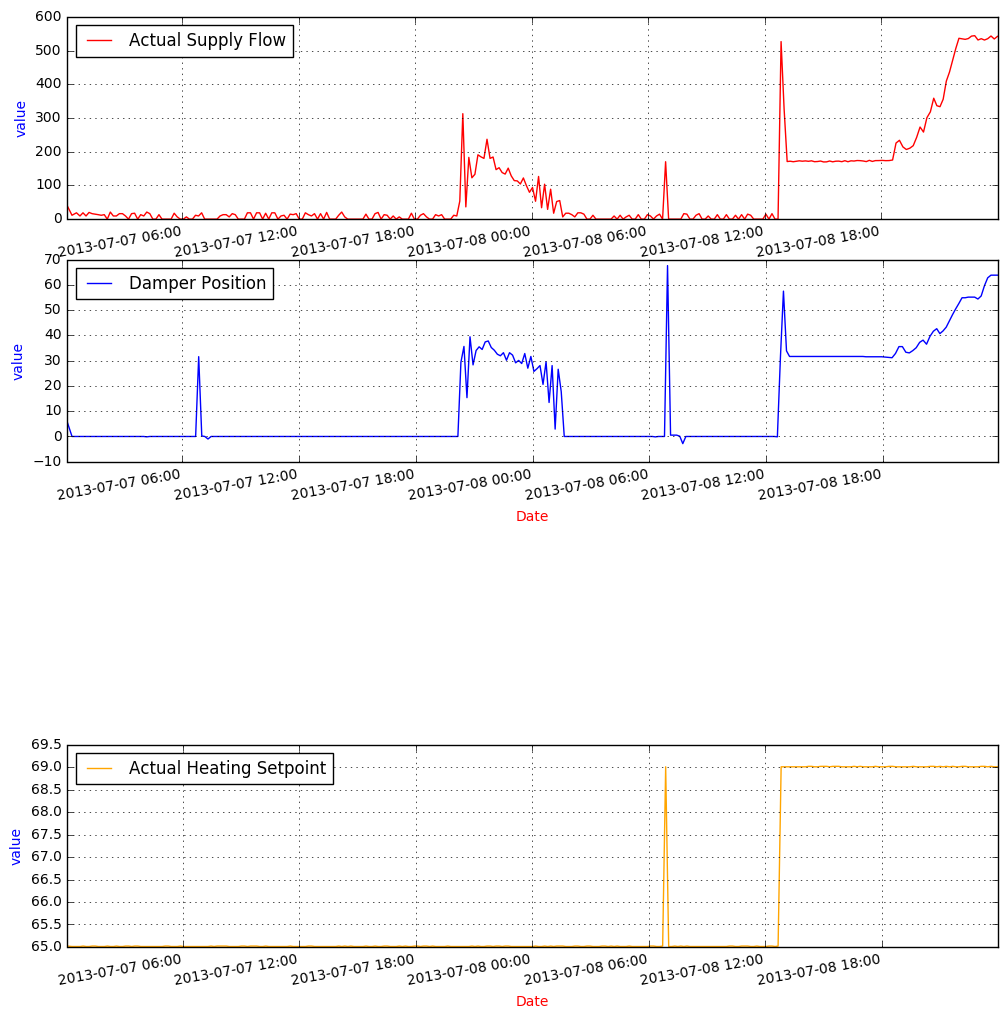

In [51]:
plot_signals_template(df,  start_date="2013-07-07", end_date="2013-07-08")

#### Observations 7/14 - Sunday
        1. Actual Supply workflow Tends to remain static and remain low
        2. Damper position is in corelation with Actual Supply workflow.
#### Observations 7/15 - Monday
        1. Durimg Summer Actual Supply flow tens to increase after 6:00 PM till midnight
        2. Damper position is in corelation with Actual Supply workflow.
        
        Conclusion - two consecutive weekend plots follow same pattern. for Sunday and Monday

Invalid date range. no data found for  Actual Cooling Setpoint


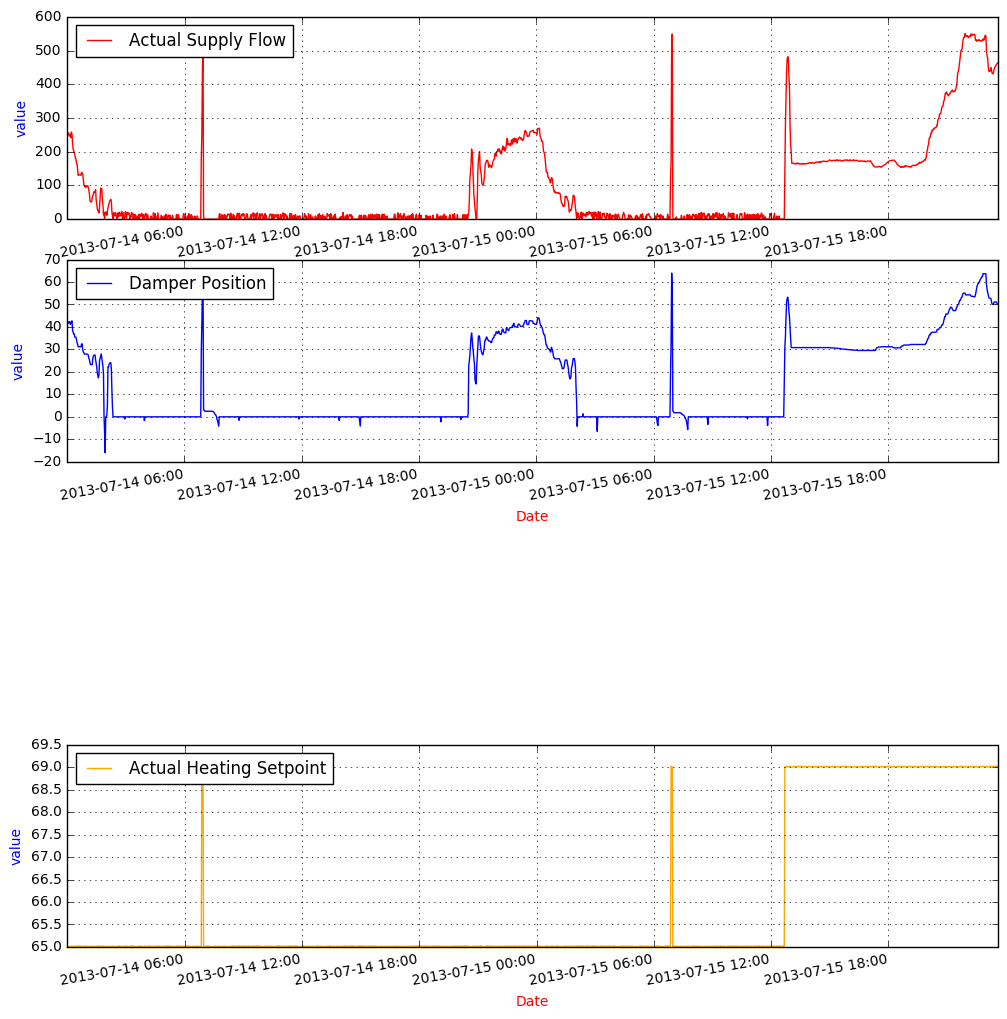

In [53]:
plot_signals_template(df,  start_date="2013-07-14", end_date="2013-07-15")

###  Winter Plot  two consecutive dates.
#### Observations
        1. Durimg Summer Actual Supply flow tens to increase after 6:00 PM till midnight
        2. Damper position is in corelation with Actual Supply workflow.
        
        conclusion- Winter plots follow same pattren as summer plot for Sunday and Monday

Invalid date range. no data found for  Actual Cooling Setpoint


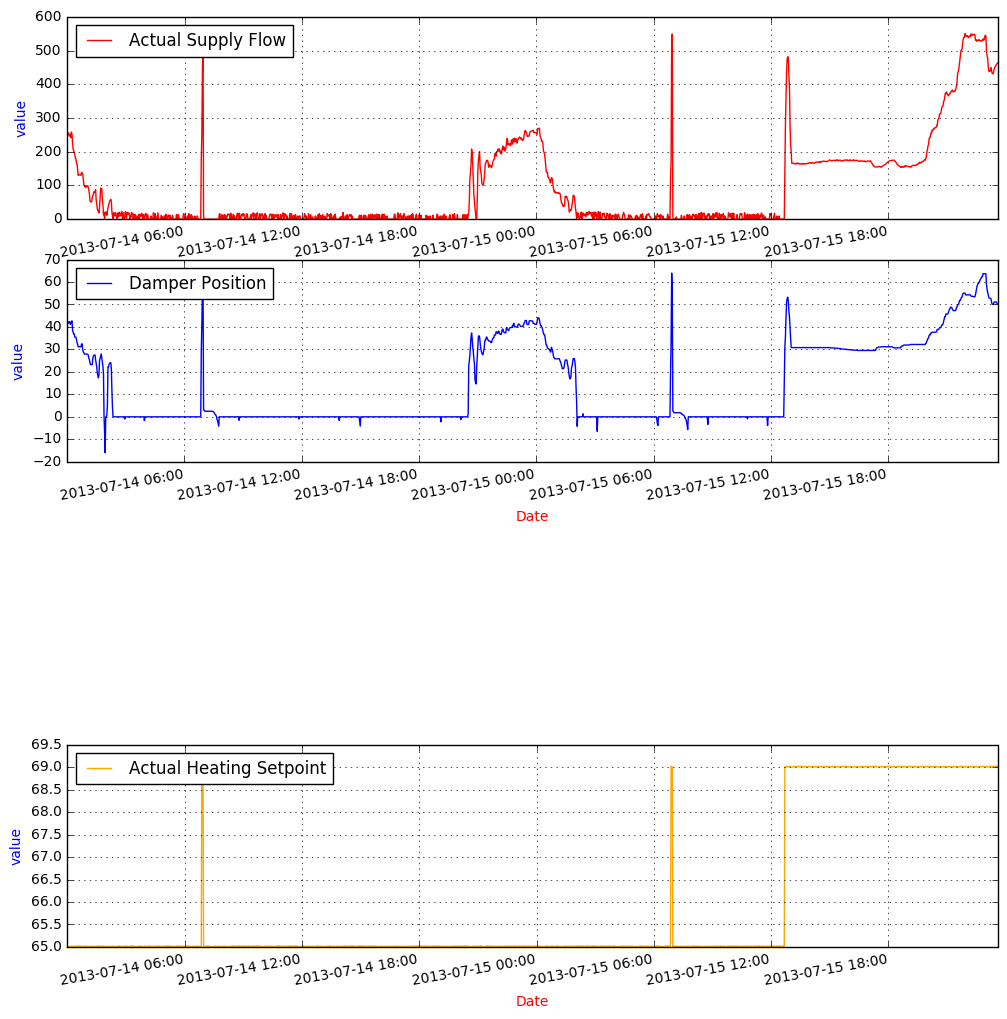

In [52]:
plot_signals_template(df,  start_date="2013-11-03", end_date="2013-11-04")

Invalid date range. no data found for  Actual Cooling Setpoint
Invalid date range. no data found for  Actual Heating Setpoint


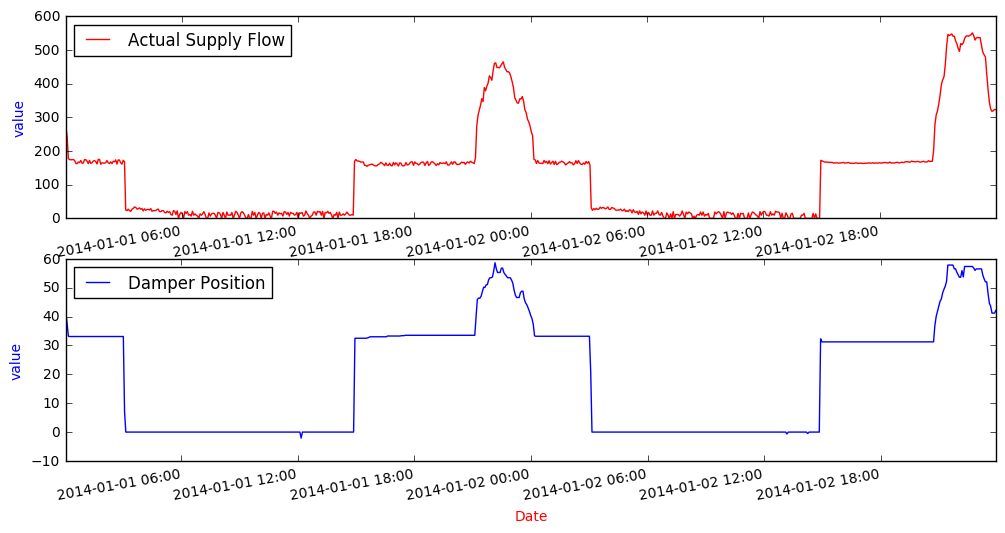

In [39]:
plot_signals_template(df,  start_date="2014-01-01", end_date="2014-01-02")

In [54]:
# plot_signals_template(df,  start_date="2013-11-01", end_date="2013-011-02")